In [10]:
# Run this command if you dont have mglearn installed. After running restart your kernel
!pip install mglearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [49]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [48]:
X_train[0]

array([2.07946779e-03, 2.20000000e-01, 1.97947214e-01, 0.00000000e+00,
       9.46502058e-02, 3.91645909e-01, 6.93099897e-01, 6.20656731e-01,
       2.60869565e-01, 2.72900763e-01, 6.91489362e-01, 9.80407484e-01,
       4.61644592e-01, 4.32418630e-06, 4.57482914e-04, 4.11624856e-04,
       0.00000000e+00, 1.96822054e-04, 8.14415054e-04, 1.44127891e-03,
       1.29063568e-03, 5.42469859e-04, 5.67488348e-04, 1.43792986e-03,
       2.03872579e-03, 9.59975060e-04, 4.84000000e-02, 4.35483871e-02,
       0.00000000e+00, 2.08230453e-02, 8.61621000e-02, 1.52481977e-01,
       1.36544481e-01, 5.73913043e-02, 6.00381679e-02, 1.52127660e-01,
       2.15689646e-01, 1.01561810e-01, 3.91830996e-02, 0.00000000e+00,
       1.87357445e-02, 7.75252166e-02, 1.37197194e-01, 1.22857271e-01,
       5.16384037e-02, 5.40199458e-02, 1.36878393e-01, 1.94068930e-01,
       9.13812608e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [18]:
X_train.shape

(379, 104)

In [19]:
y_test.shape

(127,)

In [50]:
379+127

506

#### Linear Regression

In [20]:
my_linear_reg = LinearRegression().fit(X_train, y_train)

In [21]:
my_preds_train = my_linear_reg.predict(X_train)
my_preds_test = my_linear_reg.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_linear_reg.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_linear_reg.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  1.5674141791450238
Mean Squared Error on Train data :  4.090362612543772
Training Set R squared score :  0.9520519609032729

TEST DATA RESULTS
Mean Absolute Error on Test data :  3.2258952120186133
Mean Squared Error on Test data :  32.06913512158133
Test Set R squared score :  0.6074721959665972


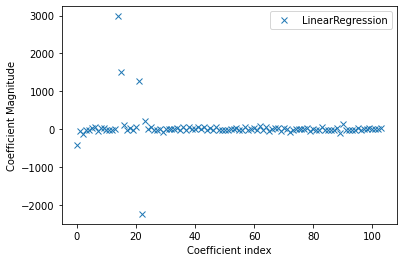

In [22]:
plt.plot(my_linear_reg.coef_,'x', label = 'LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient Magnitude')
plt.legend()

#### Ridge Regression

In [23]:
from sklearn.linear_model import Ridge

my_ridge_model = Ridge().fit(X_train, y_train)

my_preds_train = my_ridge_model.predict(X_train)
my_preds_test = my_ridge_model.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_ridge_model.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_ridge_model.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  2.1656396671236777
Mean Squared Error on Train data :  9.742485553723796
Training Set R squared score :  0.8857966585170942

TEST DATA RESULTS
Mean Absolute Error on Test data :  2.9626926001410125
Mean Squared Error on Test data :  20.19858253926341
Test Set R squared score :  0.7527683481744754


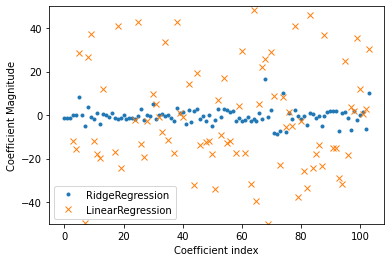

In [24]:
plt.plot(my_ridge_model.coef_, '.', label ='RidgeRegression')
plt.plot(my_linear_reg.coef_,'x', label ='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient Magnitude')
plt.ylim(-50,50)     # Ylimit(bottom,top)
plt.legend()

In [26]:
my_ridge_model = Ridge(alpha=0.5).fit(X_train, y_train)

my_preds_train = my_ridge_model.predict(X_train)
my_preds_test = my_ridge_model.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_ridge_model.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_ridge_model.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  2.0050687288446998
Mean Squared Error on Train data :  8.211738346857969
Training Set R squared score :  0.9037403798627095

TEST DATA RESULTS
Mean Absolute Error on Test data :  2.895860455142615
Mean Squared Error on Test data :  18.989806220044482
Test Set R squared score :  0.7675638302587826


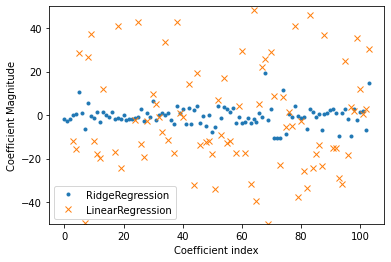

In [27]:
plt.plot(my_ridge_model.coef_, '.', label ='RidgeRegression')
plt.plot(my_linear_reg.coef_,'x', label ='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient Magnitude')
plt.ylim(-50,50)
plt.legend()

In [29]:
from sklearn.linear_model import Ridge

my_ridge_model = Ridge(alpha=2).fit(X_train, y_train)

my_preds_train = my_ridge_model.predict(X_train)
my_preds_test = my_ridge_model.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_ridge_model.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_ridge_model.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  2.378873764339877
Mean Squared Error on Train data :  11.780499812148046
Training Set R squared score :  0.8619066525203295

TEST DATA RESULTS
Mean Absolute Error on Test data :  3.1067811553368054
Mean Squared Error on Test data :  22.185110982084115
Test Set R squared score :  0.7284531415325116


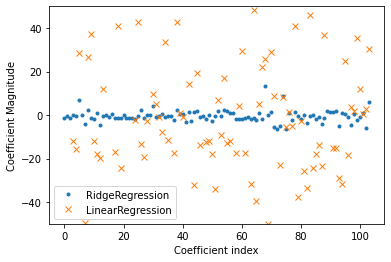

In [30]:
plt.plot(my_ridge_model.coef_, '.', label ='RidgeRegression')
plt.plot(my_linear_reg.coef_,'x', label ='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient Magnitude')
plt.ylim(-50,50)
plt.legend()

#### Lasso Regression

In [31]:
from sklearn.linear_model import Lasso

In [32]:
my_lasso = Lasso().fit(X_train, y_train)

my_preds_train = my_lasso.predict(X_train)
my_preds_test = my_lasso.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_lasso.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_lasso.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  5.512753169106904
Mean Squared Error on Train data :  60.29264561394445
Training Set R squared score :  0.29323768991114607

TEST DATA RESULTS
Mean Absolute Error on Test data :  5.488898627760888
Mean Squared Error on Test data :  64.59328142116775
Test Set R squared score :  0.20937503255272294


In [33]:
my_lasso = Lasso(alpha=.01).fit(X_train, y_train)

my_preds_train = my_lasso.predict(X_train)
my_preds_test = my_lasso.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_lasso.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_lasso.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  2.0980931241271286
Mean Squared Error on Train data :  8.86248217402341
Training Set R squared score :  0.8961122320864716

TEST DATA RESULTS
Mean Absolute Error on Test data :  2.760201063744704
Mean Squared Error on Test data :  18.9705467531401
Test Set R squared score :  0.7677995670886713


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+01, tolerance: 3.233e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [34]:
my_lasso = Lasso(alpha=.01, max_iter=10000).fit(X_train, y_train)

my_preds_train = my_lasso.predict(X_train)
my_preds_test = my_lasso.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_lasso.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_lasso.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  2.0959844813537907
Mean Squared Error on Train data :  8.85306252207227
Training Set R squared score :  0.8962226511086497

TEST DATA RESULTS
Mean Absolute Error on Test data :  2.7773320164164548
Mean Squared Error on Test data :  19.14558277883676
Test Set R squared score :  0.7656571174549982


In [35]:
my_lasso.coef_

array([ -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,  -1.43260465,
        10.94771183,   0.        ,   0.        ,   0.        ,
        -0.39260971,  -0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -8.75628457,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   2.10027365,  -0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,  -3.96958293,
         0.        ,   6.61845793,  -0.        ,  -0.        ,
        -0.        ,   0.        ,  -4.42086828,  -2.10371434,
         3.79607992,  -0.        ,   4.38591262,   0.        ,
         0.        ,   0.1795777 ,  -0.        ,  -1.1614282 ,
        -4.33485764,  -0.        ,  -0.        ,  -2.13

In [38]:
np.sum(my_lasso.coef_!=0)

33

In [39]:
my_lasso = Lasso(alpha=.0001, max_iter=100000).fit(X_train, y_train)

my_preds_train = my_lasso.predict(X_train)
my_preds_test = my_lasso.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_lasso.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_lasso.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  1.584355695780287
Mean Squared Error on Train data :  4.204341704950065
Training Set R squared score :  0.9507158754515463

TEST DATA RESULTS
Mean Absolute Error on Test data :  3.1361447728472513
Mean Squared Error on Test data :  29.105540414791957
Test Set R squared score :  0.6437467421272822


In [40]:
from sklearn.linear_model import ElasticNet

In [41]:
my_ElasticNet = ElasticNet(alpha=0.01).fit(X_train, y_train)

my_preds_train = my_ElasticNet.predict(X_train)
my_preds_test = my_ElasticNet.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', my_ElasticNet.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', my_ElasticNet.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  2.4253498365524946
Mean Squared Error on Train data :  12.338422737115776
Training Set R squared score :  0.8553665697077995

TEST DATA RESULTS
Mean Absolute Error on Test data :  3.1206032330114053
Mean Squared Error on Test data :  22.801753811315475
Test Set R squared score :  0.7209054027265394


In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10], 'max_iter':[1500, 10000, 100000]}
grid_search = GridSearchCV(my_ElasticNet, params)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.996e+02, tolerance: 2.589e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.999e+02, tolerance: 2.840e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(estimator=ElasticNet(alpha=0.01),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10],
                         'max_iter': [1500, 10000, 100000]})

In [45]:
grid_search.best_params_

{'alpha': 0.001, 'max_iter': 1500}

In [46]:
my_preds_train = grid_search.predict(X_train)
my_preds_test = grid_search.predict(X_test)

print('TRAIN DATA RESULTS')
print("Mean Absolute Error on Train data : ", mean_absolute_error(y_train, my_preds_train))
print("Mean Squared Error on Train data : ", mean_squared_error(y_train, my_preds_train))
print('Training Set R squared score : ', grid_search.score(X_train, y_train))

print('\nTEST DATA RESULTS')
print("Mean Absolute Error on Test data : ", mean_absolute_error(y_test, my_preds_test))
print("Mean Squared Error on Test data : ", mean_squared_error(y_test, my_preds_test))
print('Test Set R squared score : ', grid_search.score(X_test, y_test))

TRAIN DATA RESULTS
Mean Absolute Error on Train data :  1.8835362642637086
Mean Squared Error on Train data :  6.968661289977286
Training Set R squared score :  0.9183119748457012

TEST DATA RESULTS
Mean Absolute Error on Test data :  2.9119869621231875
Mean Squared Error on Test data :  18.570690778245716
Test Set R squared score :  0.7726938240482019
